In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('results.csv')

In [9]:
# remove rows with empty values in the Actions column
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
# convert all values to float wherever possible
df = df.applymap(lambda x: pd.to_numeric(x, errors='ignore'))




print(df[df['Problem'] == 'p1'].to_string())
print(df[df['Problem'] == 'p2'].to_string())
print(df[df['Problem'] == 'p3'].to_string())
print(df[df['Problem'] == 'p4'].to_string())

   Problem     Label  Actions  Expansions  Goal Tests  New Nodes  Plan Length     Time
0       p1       bfs     20.0        43.0        56.0      178.0          6.0  0.03830
1       p1       dfs     20.0        21.0        22.0       84.0         20.0  0.00890
2       p1       ucs     20.0        60.0        62.0      240.0          6.0  0.02620
3       p1  gb-unmet     20.0         7.0         9.0       29.0          6.0  0.00365
4       p1  gb-level     20.0         6.0         8.0       28.0          6.0  1.17000
5       p1    gb-max     20.0         6.0         8.0       24.0          6.0  0.34000
6       p1    gb-set     20.0         7.0         9.0       31.0          7.0  1.84000
7       p1  as-unmet     20.0        50.0        52.0      206.0          6.0  0.04050
8       p1  as-level     20.0        28.0        30.0      122.0          6.0  0.63600
9       p1    as-max     20.0        43.0        45.0      180.0          6.0  0.35100
10      p1    as-set     20.0        51.0  

In [43]:
def use_dark_settings():
    """Sets the plotting style for a dark background.

    Note: order of operations matters (sns followed by plt)
    """
    sns.set(style="ticks", context="talk")
    plt.style.use("dark_background")


def use_light_settings():
    """Sets the plotting style for a light background.

    Note: order of operations matters (plt followed by sns)
    """
    plt.style.use("default")
    sns.set(style="ticks", context="talk")

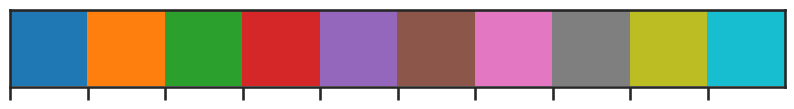

<Figure size 1200x800 with 0 Axes>

In [44]:
# User defined plot settings
darkmode = False
palette = 'tab10'
context = 'paper'
figsize = (12, 8)

# Set dark/light mode
if darkmode:
    use_dark_settings()
else:
    use_light_settings()

# Set sns palette
sns.set_palette(palette)
# Show palette
sns.palplot(sns.color_palette())

# Set fig size and context
plt.figure(figsize=figsize)
sns.set_context(context=context)
line_styles = ['solid', 'dashed', 'dashdot', 'dotted']
num_styles = len(line_styles)


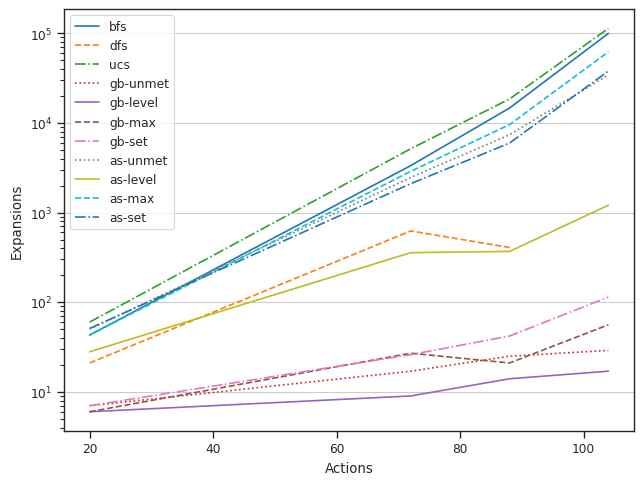

In [49]:
# Expansions plot
fig, ax = plt.subplots()
fig.tight_layout()
#ax.set_title('Expansions vs Actions')
ax.set_xlabel('Actions')
ax.set_ylabel('Expansions')
ax.set_yscale('log')
ax.grid(axis='y')
g = sns.lineplot(
    data = df,
    x='Actions',
    y='Expansions',
    hue='Label',
    palette=palette,
)
# Set line style to alternate between line style
legend_lines = ax.legend().get_lines()
for i in range(len(legend_lines)):
    legend_lines[i].set_linestyle(line_styles[i%num_styles])
    ax.lines[i].set_linestyle(line_styles[i%num_styles])
fig.savefig('expansions_vs_actions.png', dpi=600, bbox_inches="tight")
plt.show()



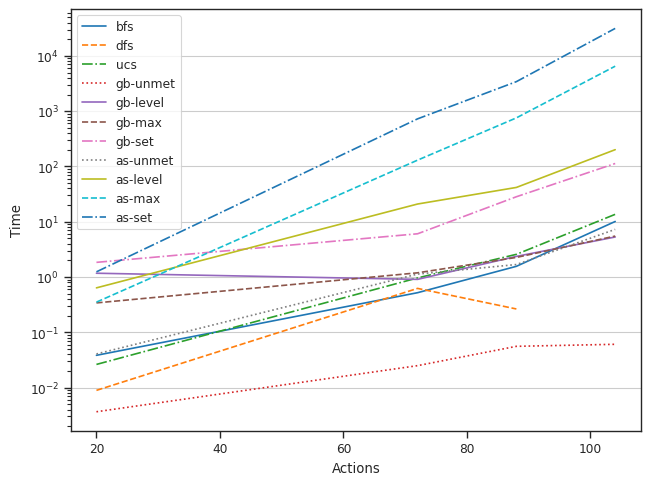

In [48]:
# Time Plot
fig, ax = plt.subplots()
fig.tight_layout()
#ax.set_title('Expansions vs Actions')
ax.set_xlabel('Actions')
ax.set_ylabel('Time')
ax.set_yscale('log')
ax.grid(axis='y')
g = sns.lineplot(
    data = df,
    x='Actions',
    y='Time',
    hue='Label',
    palette=palette,
)
# Set line style to alternate between line style
legend_lines = ax.legend().get_lines()
for i in range(len(legend_lines)):
    legend_lines[i].set_linestyle(line_styles[i%num_styles])
    ax.lines[i].set_linestyle(line_styles[i%num_styles])
fig.savefig('time_vs_actions.png', dpi=600, bbox_inches="tight")
plt.show()

In [13]:
# Create a new df based on df that has the label as the index and the columns as the time for each problem
df2 = df.pivot(index='Label', columns='Problem', values='Plan Length')

In [14]:
df2


Problem,p1,p2,p3,p4
Label,,,,
as-level,6.0,9.0,12.0,15.0
as-max,6.0,9.0,12.0,14.0
as-set,6.0,9.0,12.0,14.0
as-unmet,6.0,9.0,12.0,14.0
bfs,6.0,9.0,12.0,14.0
dfs,20.0,619.0,392.0,NaN
gb-level,6.0,9.0,14.0,17.0
gb-max,6.0,9.0,13.0,17.0
gb-set,7.0,10.0,18.0,24.0
